This notebook contains experiments for:

* Loss functions
* Learning rate decay
* Weight initialization
* Optimizers
* Dropout

# `lincoln` imports

In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import lincoln
from lincoln.layers import Dense
from lincoln.losses import SoftmaxCrossEntropy, MeanSquaredError
from lincoln.optimizers import Optimizer, SGD, SGDMomentum
from lincoln.activations import Sigmoid, Tanh, Linear, ReLU
from lincoln.network import NeuralNetwork
from lincoln.train import Trainer
from lincoln.utils import mnist
from lincoln.utils.np_utils import softmax

In [4]:
#mnist.init() Use the function once

In [5]:
X_train, y_train, X_test, y_test = mnist.load()

In [6]:
num_labels = len(y_train)
num_labels

60000

In [7]:
# one-hot encode
num_labels = len(y_train)
train_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    train_labels[i][y_train[i]] = 1

num_labels = len(y_test)
test_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    test_labels[i][y_test[i]] = 1

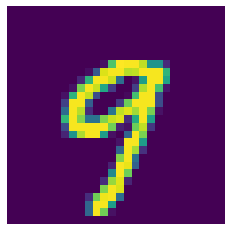

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X_train[45]
some_digit_image = some_digit.reshape(28, 28)
plt.subplot(1, 1, 1)
image = some_digit_image
plt.imshow(image.astype(np.uint8))
plt.axis('off');

# MNIST Demos

# Scale data to mean 0, variance 1

In [ ]:
X_train, X_test = X_train - np.mean(X_train), X_test - np.mean(X_train)

In [ ]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

In [ ]:
X_train, X_test = X_train / np.std(X_train), X_test / np.std(X_train)

In [ ]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

In [ ]:
def calc_accuracy_model(model, test_set):
    return print(f'''The model validation accuracy is: {np.equal(np.argmax(model.forward(test_set, inference=True), axis=1), y_test).sum() * 100.0 / test_set.shape[0]:.2f}%''')

## Softmax cross entropy

### Trying sigmoid activation

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(normalize=False), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

Note: even if we normalize the outputs of a classification model with mean squared error loss, it still doesn't help:

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(normalize=True), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

The reason is that we should be using softmax cross entropy loss!

#### Trying sigmoid activation

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Sigmoid()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 130,
            eval_every = 1,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

#### Trying ReLU activation

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=ReLU()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

## SGD Momentum

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Sigmoid()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optim = SGDMomentum(0.1, momentum=0.9)

trainer = Trainer(model, SGDMomentum(0.1, momentum=0.9))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 1,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optim = SGD(0.1)

optim = SGDMomentum(0.1, momentum=0.9)

trainer = Trainer(model, SGDMomentum(0.1, momentum=0.9))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

## Different weight decay

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optimizer = SGDMomentum(0.15, momentum=0.9, final_lr = 0.05, decay_type='linear')

trainer = Trainer(model, optimizer)
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optimizer = SGDMomentum(0.2, 
                        momentum=0.9, 
                        final_lr = 0.05, 
                        decay_type='exponential')

trainer = Trainer(model, optimizer)
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60);

calc_accuracy_model(model, X_test)

## Changing weight init

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

optimizer = SGDMomentum(0.15, momentum=0.9, final_lr = 0.05, decay_type='linear')

trainer = Trainer(model, optimizer)
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

## Dropout

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

## Deep Learning, with and without Dropout

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 100,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGDMomentum(0.2, momentum=0.9, final_lr = 0.05, decay_type='exponential'))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 100,
       eval_every = 10,
       seed=20190119,
           batch_size=60,
           early_stopping=True);

calc_accuracy_model(model, X_test)